In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [34]:
# Set up training dataset
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/sethg/OneDrive/Desktop/CatDog/training_set',
    batch_size=32,
    image_size=(224, 224))

# Set up testing dataset
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/sethg/OneDrive/Desktop/CatDog/test_set',
    batch_size=32,
    image_size=(224, 224))

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


Data preprocessing

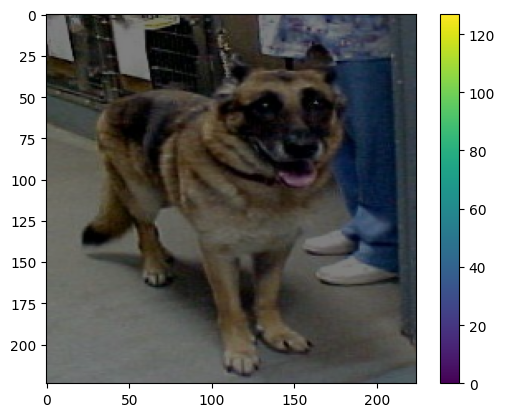

In [35]:
# Extract a single batch from the training set
batch = next(iter(training_set))

# Apply the preprocessing factor
factor = 0.5
image = np.clip(batch[0] * factor, 0, 255).astype(np.uint8)

# Plot the preprocessed image
plt.imshow(image[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [36]:
# Scale values to a range of 0 to 1 before feeding them to the NN
training_set = training_set.map(lambda x, y: (x / 255.0, y))
test_set = test_set.map(lambda x, y: (x / 255.0, y))

Build the model

In [37]:
model = tf.keras.models.Sequential([
    # 32 filters of 3x3
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),

    # reduce dimensionality by half
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 64 filters of 3x3
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # reduce dimensionality by half
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 128 filters of 3x3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),

    # reduce dimensionality by half
    tf.keras.layers.MaxPooling2D((2, 2)),

    # flatten into one-dimensional vector
    tf.keras.layers.Flatten(),

    # 128 unit dense layer
    tf.keras.layers.Dense(128, activation='relu'),

    # final classifier
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compile the model

In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Feed the model

In [39]:
model.fit(training_set, epochs=1, validation_data=test_set)

251/251 [==============================] - 145s 576ms/step - loss: 0.7000 - accuracy: 0.5818 - val_loss: 0.6395 - val_accuracy: 0.6431


Evaluate accuracy

In [51]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
test_acc = int(test_acc*100)
print(f'\nTest accuracy: {test_acc}%')

64/64 - 7s - loss: 0.6395 - accuracy: 0.6431 - 7s/epoch - 112ms/step

Test accuracy: 64%


Make predictions

In [41]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [42]:
predictions = probability_model.predict(test_set)

64/64 [==============================] - 7s 112ms/step


1/1 [==============================] - 0s 115ms/step


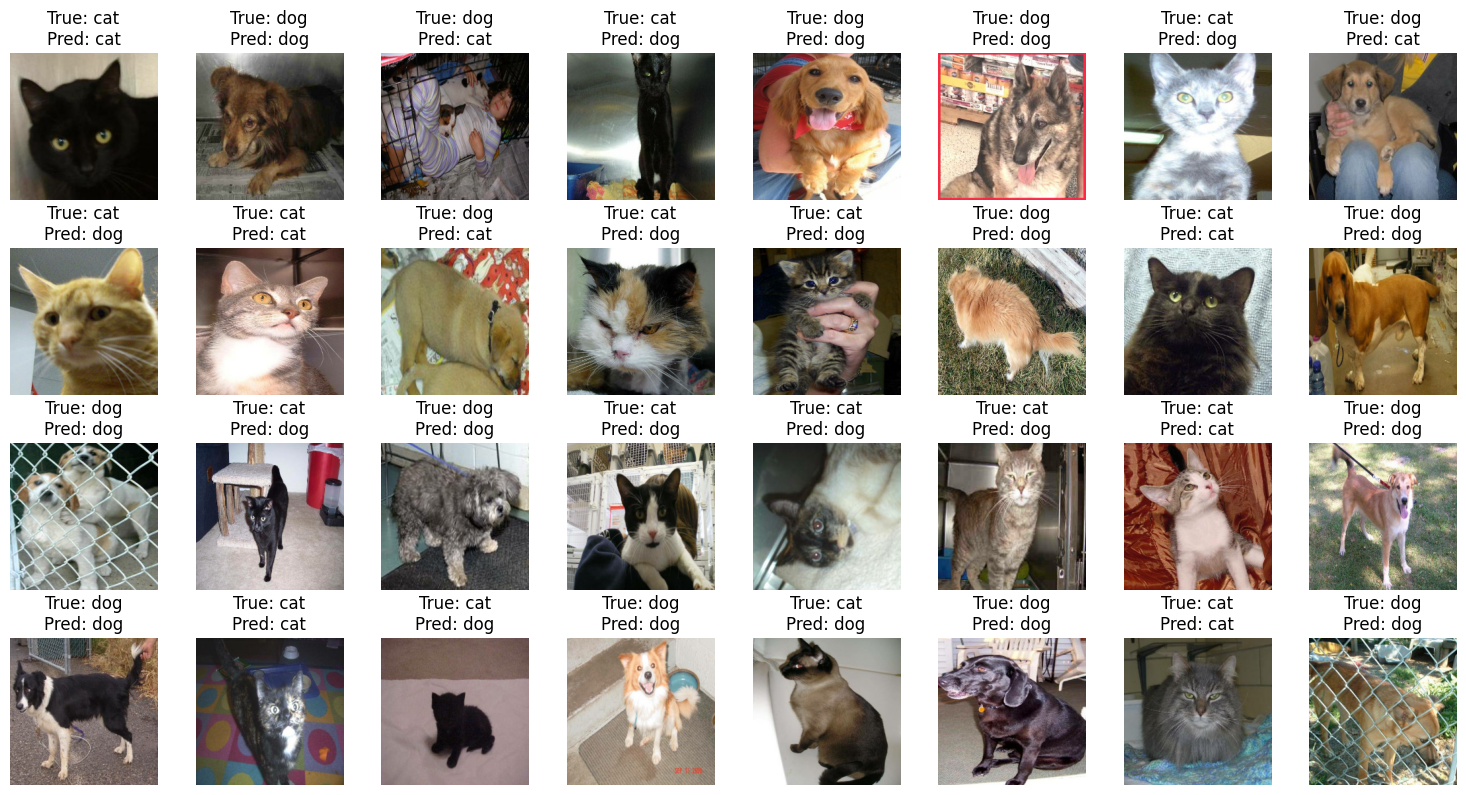

Batch accuracy = 56%


In [52]:
# Get a batch of images and their true labels
batch = test_set.take(1)
images, labels = next(iter(batch))

# Get the predicted labels for the images using the trained model
predictions = model.predict(images)

# Plot the images and their true/predicted labels
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
axs = axs.flatten()
corrects = 0
for i in range(len(axs)):
    # Plot the image
    axs[i].imshow(np.squeeze(images[i]))
    axs[i].axis('off')
    
    # Set the title to the true label and predicted label
    true_label = 'cat' if labels[i] == 0 else 'dog'
    pred_label = 'cat' if predictions[i] < 0.5 else 'dog'
    if true_label == pred_label:
        corrects += 1
    title = f'True: {true_label}\nPred: {pred_label}'
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

accuracy = int((corrects/32)*100)
print(f"Batch accuracy = {accuracy}%")
# # Evaluate the accuracy of the model on the batch
# accuracy = np.mean((predictions > 0.5) == labels)
# print(f'Accuracy: {accuracy:.2f}')